In [1]:
from main import *

/Users/dex/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)


In [2]:
labels = get_annotations("""DHF=='DHF' or DSS=='DSS'""",
                         """DF=='DF'""",
                         """Dengue_Acute=="Dengue_Acute" \
                         or Dengue_Early_Acute=='Dengue_Early_Acute' \
                         or Dengue_Late_Acute == 'Dengue_Late_Acute' \
                         or Dengue_DOF < 10""")


/Users/dex/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
labels.to_csv("labels.csv")

In [4]:
!open labels.csv

In [5]:
labels = pd.read_csv("labels.csv", index_col = 0)

In [3]:
names = labels[['gse_name', 'gpl_name']].drop_duplicates()

In [7]:
names

,gse_name,gpl_name
1,GSE13052,GPL2700
30,GSE17924,GPL4133
78,GSE18090,GPL570
105,GSE25001,GPL6104
323,GSE25226,GPL5621
357,GSE38246,GPL15615
471,GSE40628,GPL16021
504,GSE43777,GPL201
672,GSE43777,GPL570
773,GSE51808,GPL13158


In [4]:
combat = get_combat(names.to_records(index=False), labels)

Cluster size 18749 broken into 9131 9618 
Cluster size 9131 broken into 3912 5219 
Cluster size 3912 broken into 2761 1151 
Cluster size 2761 broken into 1587 1174 
Cluster size 1587 broken into 786 801 
Done cluster 786 
Done cluster 801 
Done cluster 1587 
Done cluster 1174 
Done cluster 2761 
Done cluster 1151 
Done cluster 3912 
Cluster size 5219 broken into 2485 2734 
Cluster size 2485 broken into 380 2105 
Done cluster 380 
Cluster size 2105 broken into 2036 69 
Cluster size 2036 broken into 1003 1033 
Done cluster 1003 
Done cluster 1033 
Done cluster 2036 
Done cluster 69 
Done cluster 2105 
Done cluster 2485 
Cluster size 2734 broken into 1238 1496 
Done cluster 1238 
Done cluster 1496 
Done cluster 2734 
Done cluster 5219 
Done cluster 9131 
Cluster size 9618 broken into 4889 4729 
Cluster size 4889 broken into 2601 2288 
Cluster size 2601 broken into 1287 1314 
Done cluster 1287 
Done cluster 1314 
Done cluster 2601 
Cluster size 2288 broken into 1005 1283 
Done cluster 1005

/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: mgcv

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: nlme

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: This is mgcv 1.8-7. For overview type 'help("mgcv-package")'.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: genefilter

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’

  res = super(Function, self).

 37229 
Found 9 batches
Adjusting for 1 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘genefilter’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/dex/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:base’:

    anyNA


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [3]:
# combat.to_csv("combat.csv")
combat = pd.read_csv("combat.csv", index_col=[0,1]).head(100)

In [4]:
labels = labels.set_index("gsm_name")
labels['outcome'] = None
for label in "df", "dhf", "dss":
    labels.outcome[labels[label]==label]=label
joint_index = combat.columns.intersection(labels.index)
labels = labels.ix[joint_index]
combat = combat[joint_index]

/Users/dex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
import scipy.stats as stats

In [6]:
def getAnova(row):
    
    return stats.f_oneway(combat[labels.query("""outcome=='df'""").index].ix[row],
                   combat[labels.query("""outcome=='dhf'""").index].ix[row],
                   combat[labels.query("""outcome=='dss'""").index].ix[row])

In [7]:
pd.DataFrame([(row[0],
               row[1], 
               getAnova(row)[0], 
               getAnova(row)[1]) for row in combat.head(100).index], 
             columns = ("Gene", "id", "f", "p")).sort('p')

,Gene,id,f,p
71,ACOX2,8309,12.742957,0.000004
49,ABR,29,8.991778,0.000142
12,ABAT,18,6.509057,0.001597
44,ABI2,10152,4.953958,0.007345
47,ABLIM1,3983,4.795962,0.008581
42,ABHD2,11057,4.214494,0.015217
77,ACPP,55,4.123910,0.016640
58,ACADSB,36,3.293869,0.037779
11,AATF,26574,3.239701,0.039859
29,ABCC8,6833,3.170114,0.042700


In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
X = combat.T
y = labels.outcome.replace("df", 0).replace("dhf", 1).replace("dss", 2)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

Automatically created module for IPython interactive environment


In [9]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [10]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [11]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Populating the interactive namespace from numpy and matplotlib


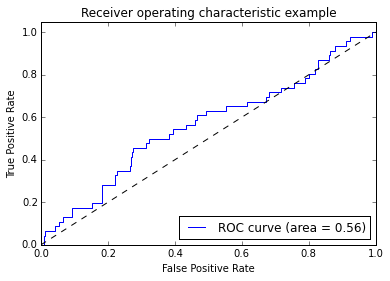

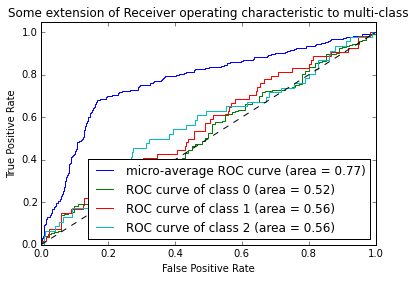

In [12]:
%pylab inline
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()